## Guilherme Michel Lima de Carvalho

### Forest Fire and  percolation theory
#### What is percolation?

Imagine a large array of squares. We imagine this array to be so large that any effects from its boundaries are negligible. Physicists call such an array a square lattice. Now a certain fraction of squares are filled with a big dot in the centre, whereas the other squares are left empty. We now define a _cluster_ as a group of neighbour squares occupied by these big dots. Here we have to call squares with one common side as nearest neighbour sites on the square lattice. All sites within one cluster are thus connected to each other by one unbroken chain of nearest-neighbour links from one occupied square to a neighbour square also occuppied by a big dot. Percolation theory now deals with the number and properties of these clusters. 

_Each site of a very large lattice is occupied randomly with probability p, independent of its neighbours. Percolation theory deals with the clusters thus formed, in other words with the groups of neighbouring occupied sites._ 

**Forest Fires**

Let's try to introduce a simple model for forest fires. Its aim is not so much to help fighting fires but to help to understand the idea of percolation threshold, the concept of a sharp transition with divering times, and computer simulation.

French scientists in Marseillles and elsewhere are interested, for obvious reasons, in understading and controlling forest fires. They told us of the following percolation problem which can easily be simulated on a computer. How long does a forest fire take to either penetrate the forest or to be extinguished?


For the purpose of simulate a forest fire, we approximate the forest by a square lattice. Each square is either occupied by a tree, in which case we call that site 'green', or empty, in wich case we call it 'white'. The probability for a green square is $p$, that for a white square is $(1-p)$. For $p=1$ all squares would correspond to trees, which would be appropriate to a garden of apple trees but not for a natural forest. The fact that $p<1$ allows for holes(white squares) which cause disorder in the forest. This distribution of white and green sites is our initial state.

Now let some trees burn and call those squares which correspond to burning trees 'red' sites. The simplest choice is to light all the trees in the first row of the lattice, whereas the remaining trees, remain green. Does this fire on one side of the forest penetrate through the whole forest down to line $L$ of our array?

For this purpose we have to clarify how a tree can ignite the other trees. To simplify the computer simulation we go through our lattice regularly first scanning the first line of trees from left to right and checking which neighbours they ignite, then scanning the second line in the same way, and so on until we reach the last line of trees. During the whole simulation, a green tree is ignited and becomes red if it neighbours another red tree which at that time is still burning. Thus a just ignited tree ignites its right and bottom neighbour within the same sweep through the lattice, its top and left neighbour tree at the next sweep. Reaching the end, we start again with the tree at extreme left in the first line. Each sweep through the whole lattice constitutes one time unit in our simulation. We assume that the fire can spread only to green nearest neighbour trees, not to trees which are farther away. Futhermore, a tree which has burnt during one time unit is regarded as burnt out ('black') and no longer ignites any other tree. We regard the rest fire as terminated if it either has reached the last line or if no burning trees are left. The lifetime of the forest fire is defined as the number of sweeps through the lattice until termination is reached, averaged over many distributions of trees among the sites of the same lattice at the same probability $p$.





### First example:

Let's simulate a forest in a square lattice , choosing some values of $p$ to see the clusters.

- 'green': there is a tree in this site.

- 'white': this site is empty.

#### Some concepts : 

- The probability for a green square in a lattice is $p$, that for a white square is $(1-p)$, for $p=1$ all square would corresp to trees, and for $p=0$ all squares are empty

- The fact that $p<1$ allows for holes(white squares) which cause disorder in the forest. This distribution of green and white squares is our initial state.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors
from IPython.display import HTML
import random
import imageio

In [2]:
random.seed(20)

#### Let's create a forest with some value of p

In [44]:
def create_forest(nx,ny,p):
    random.seed(20)
    ### Let's create an lattice of zeros
    forest = np.zeros((nx,ny)) ### initially all the squares are empty
    ### The states are EMPTY or TREE in that lattice
    EMPTY = 0
    TREE = 1 
    
    ### Let's generate a forest for this value of p
    for i in range(nx):
        for j in range(ny):
            if(np.random.uniform(0,1) < p):
                forest[i][j]=TREE
            else:
                forest[i][j]=EMPTY
    return forest

In [4]:
nx, ny = 30, 30
p = 0.1

forest_example1 = create_forest(nx,ny,p)

#### Now, let's see a plot this forest

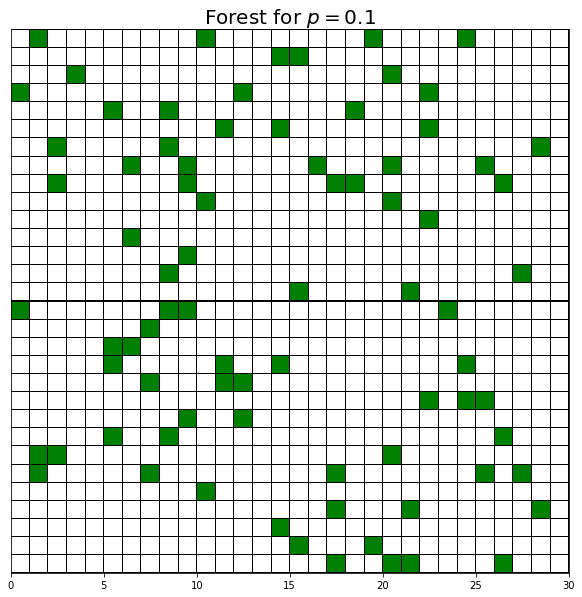

In [5]:
colors_list = ['white', 'green']
cmap = colors.ListedColormap(colors_list)

plt.figure(figsize=(10,10))
plt.title('Forest for $p=0.1$', fontsize=20)
plt.pcolormesh(forest_example1, cmap = cmap, edgecolors='k', linewidth=0.01)
#plt.xticks([],[])
plt.yticks([],[])
plt.show()

### Now let's see a plot changing the values of p, for see what's happening

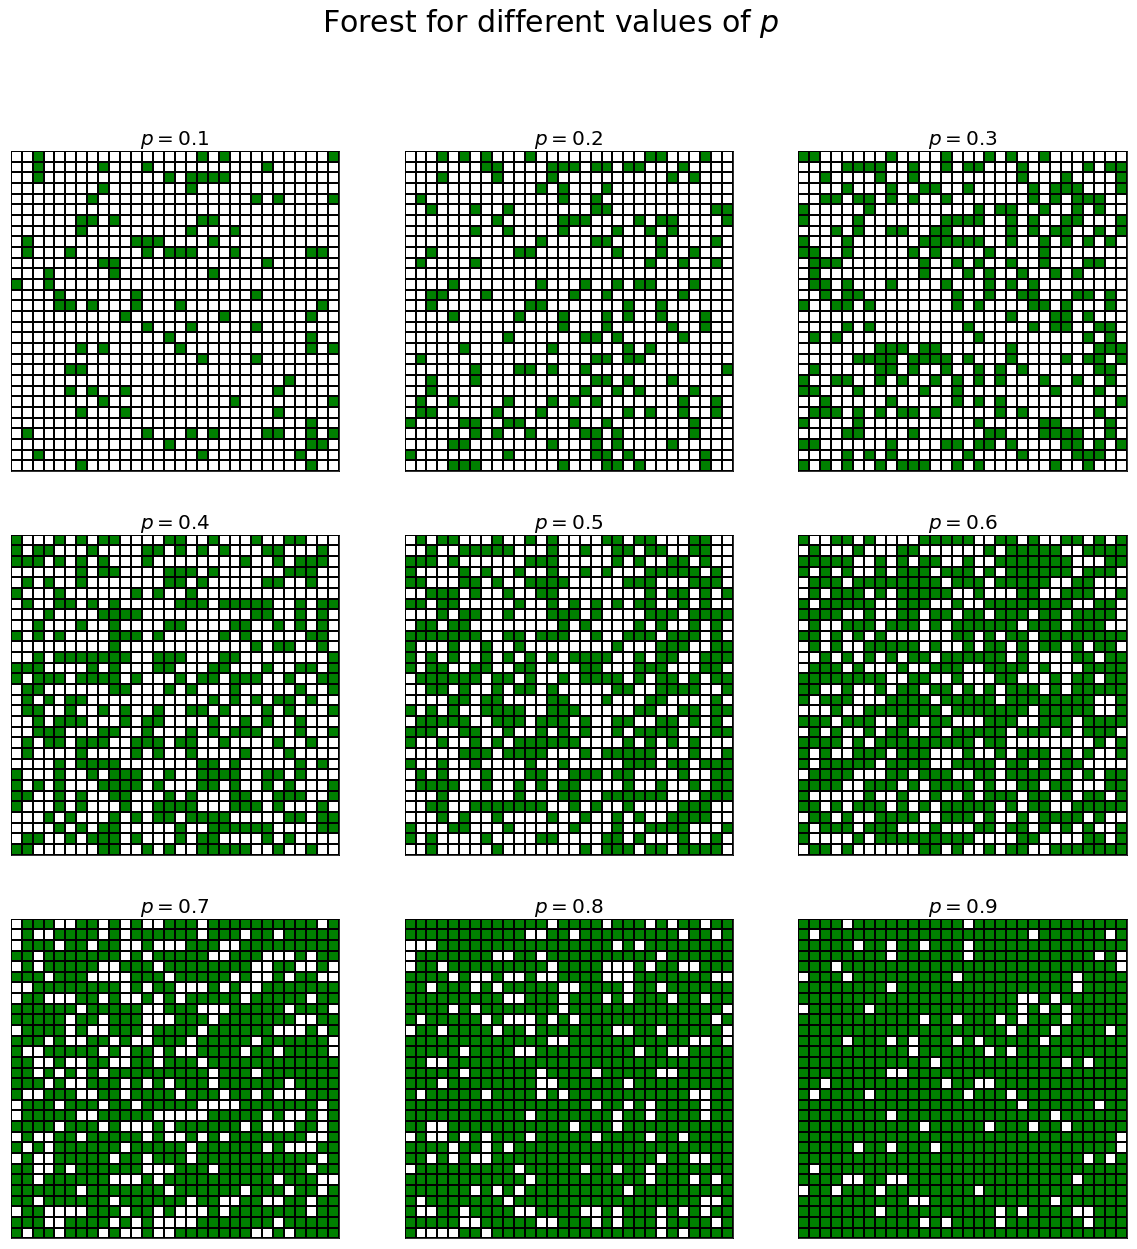

In [6]:
probabilities_values = np.linspace(0.1,0.9,9)
nx, ny = 30, 30
colors_list = ['white', 'green']
cmap = colors.ListedColormap(colors_list)


fig, axs = plt.subplots(3,3, figsize=(20,20))
ax = axs.flatten()

titles = ['$p=0.1$','$p=0.2$','$p=0.3$','$p=0.4$','$p=0.5$','$p=0.6$','$p=0.7$','$p=0.8$','$p=0.9$','$p=1$']
fig.suptitle('Forest for different values of $p$', fontsize=30)

for i in range(len(probabilities_values)):
    forest = create_forest(nx,ny,probabilities_values[i])
    ax[i].pcolormesh(forest, cmap = cmap,edgecolors='k')
    ax[i].set_xticks([],[])
    ax[i].set_yticks([],[])
    ax[i].set_title(titles[i], fontsize=20)
    

### Now let's choose one forest representation and simulate the forest fire

#### Rules: 
- Here i put the rules


In [7]:
def forest_fire(forest,tmax):
    EMPTY,TREE,FIRE,DEAD = 0,1,2,3
    forest1 = forest.copy()
    
    size_forest = [len(forest),len(forest)]
    state_of_sites = np.zeros((tmax, *size_forest))

    ### Initial state: All the tree in the first line of the forest are burning
    for i in range(len(forest[0])):
        if(forest1[0,i] == TREE):
            forest1[0,i] = FIRE
    
    state_of_sites[0] = forest1
    
    ### Let's create a function to see if there is not anyone tree burning 
    def burning_trees(forest):
        for i in range(len(forest)):
            for j in range(len(forest)):
                if(forest[i][j] == FIRE):
                    return(True)
        return(False)


    t=1
    while((burning_trees(state_of_sites[t-1]) == True) and (t <(tmax-1))):
        state_of_sites[t] = state_of_sites[t-1].copy()
        for x in range(len(forest)):
            for y in range(len(forest)):
                if(state_of_sites[t-1,x,y] == FIRE):
                    state_of_sites[t,x,y]=DEAD 
                    
                    # Let's try to burn the neighbours
                    if(y!=0):
                        if(x!=len(forest)-1):
                            if(state_of_sites[t-1, x+1,y-1] == TREE):
                                state_of_sites[t,x+1,y-1] = FIRE
                                
                        if(x!=0):
                            if(state_of_sites[t-1,x,y-1] == TREE):
                                state_of_sites[t,x,y-1]=FIRE
                                
                    if(x!=len(forest)-1):         
                        if(state_of_sites[t-1,x+1,y] == TREE):
                            state_of_sites[t,x+1,y]=FIRE
                        
                            
                        
                    if(y!=len(forest)-1):
                        if(x!=len(forest)-1):
                            if(state_of_sites[t-1,x+1,y+1]==TREE):
                                state_of_sites[t,x+1,y+1]=FIRE
                                
        
                        if(state_of_sites[t-1,x,y+1] == TREE):
                            state_of_sites[t,x,y+1]=FIRE
                            
                                
        t=t+1
        
    return(state_of_sites[0:t])

### Now let's make an animation using this function

In [8]:
### First, let's create a forest with probability of a tree equal to 0.4
np.random.seed(30)
forest_to_burn = create_forest(30,30,0.7)


### let's see the forest first 

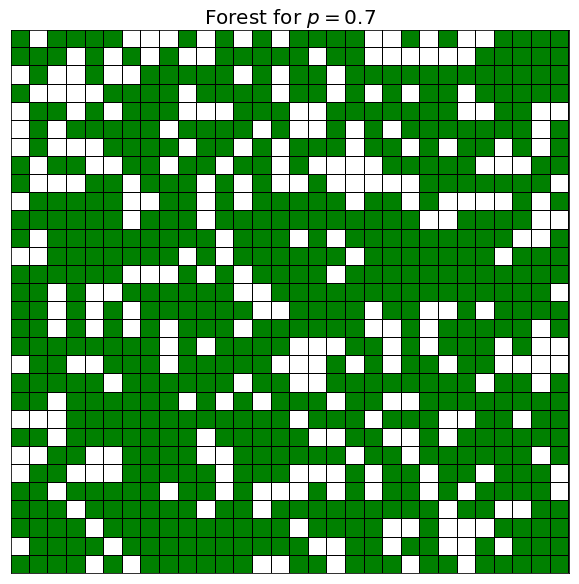

In [9]:
colors_list = ['white', 'green']
cmap = colors.ListedColormap(colors_list)

plt.figure(figsize=(10,10))
plt.title('Forest for $p=0.7$', fontsize=20)
plt.pcolormesh(forest_to_burn, cmap = cmap, edgecolors='k', linewidth=0.01)
plt.xticks([],[])
plt.yticks([],[])
plt.show()

In [10]:
### Now, let's burn this forest
simulation = forest_fire(forest_to_burn,tmax=300)

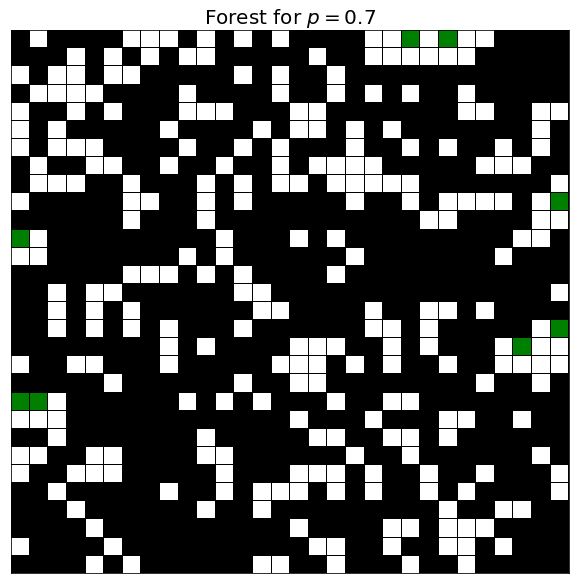

In [11]:
colors_list = ['white', 'green','red','black']
cmap = colors.ListedColormap(colors_list)

plt.figure(figsize=(10,10))
plt.title('Forest for $p=0.7$', fontsize=20)
plt.pcolormesh(simulation[30], cmap = cmap, edgecolors='k', linewidth=0.01)
plt.xticks([],[])
plt.yticks([],[])
plt.show()

### Let's make the animation!

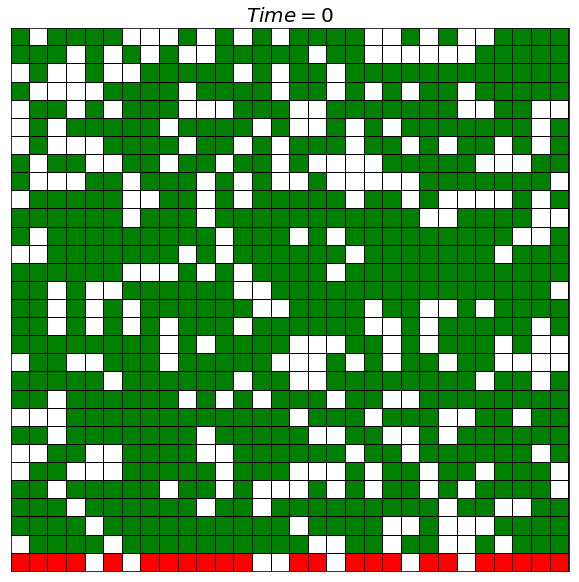

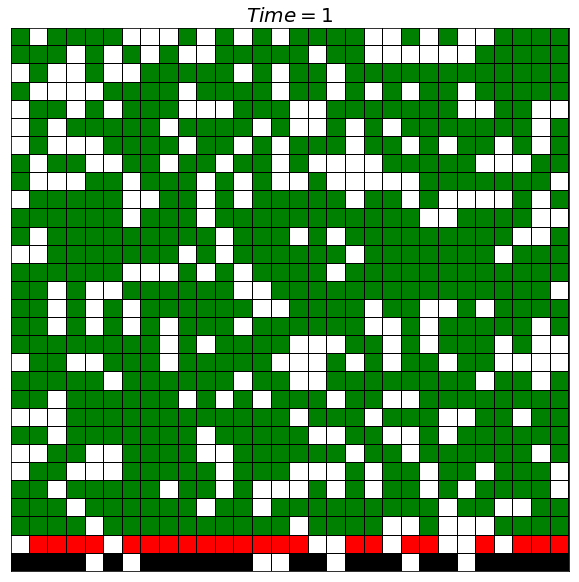

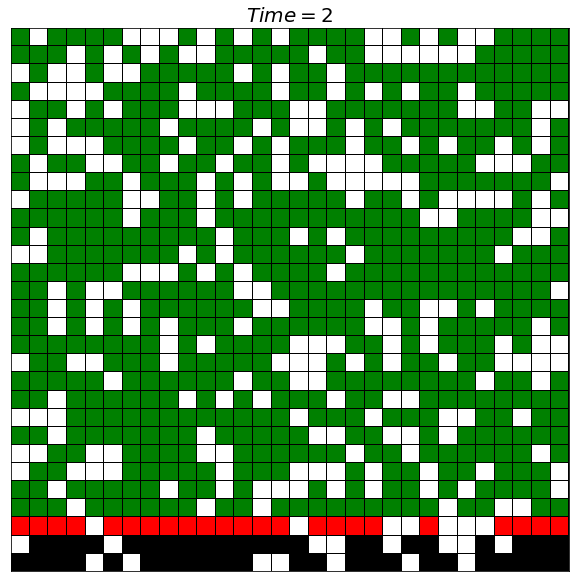

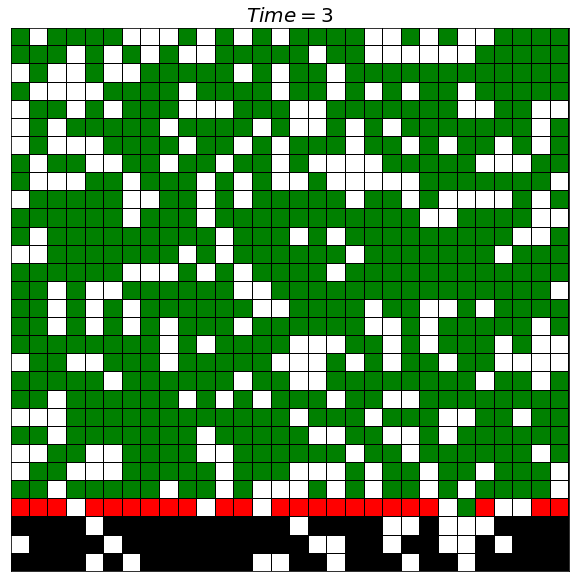

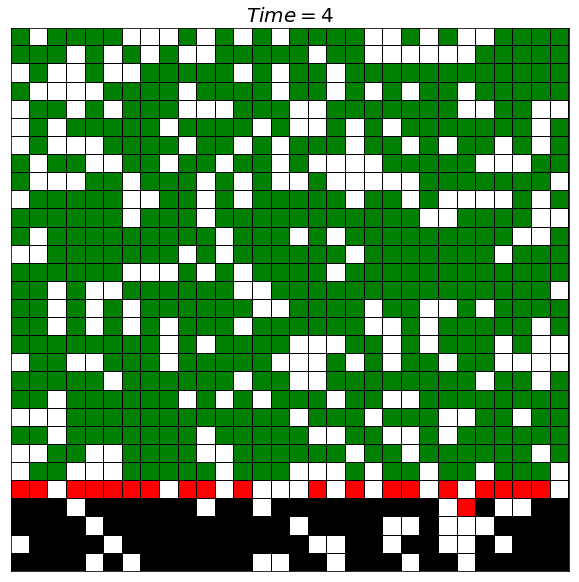

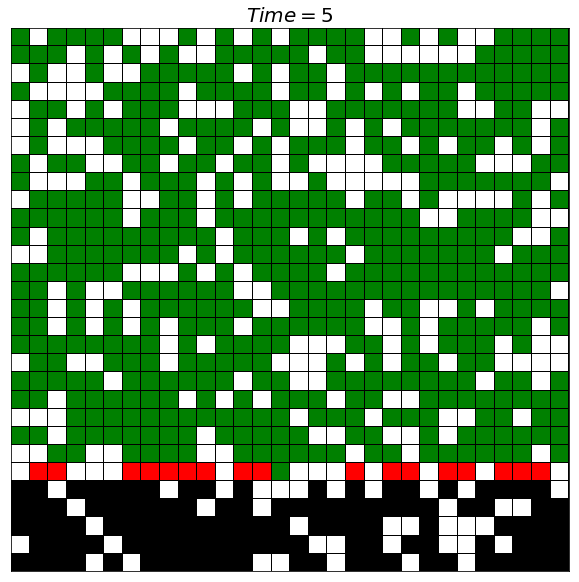

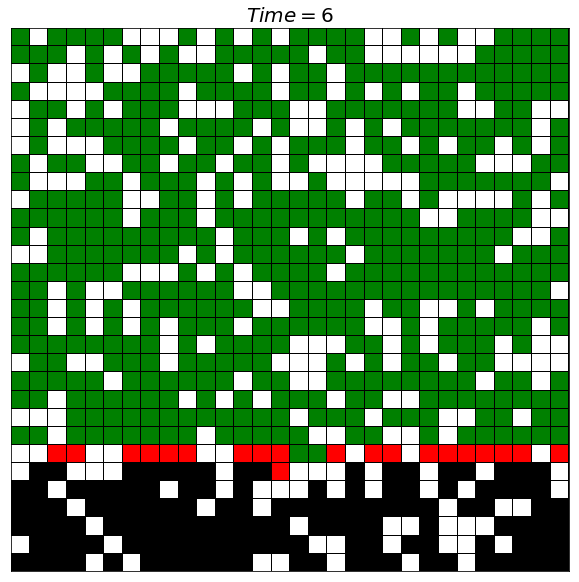

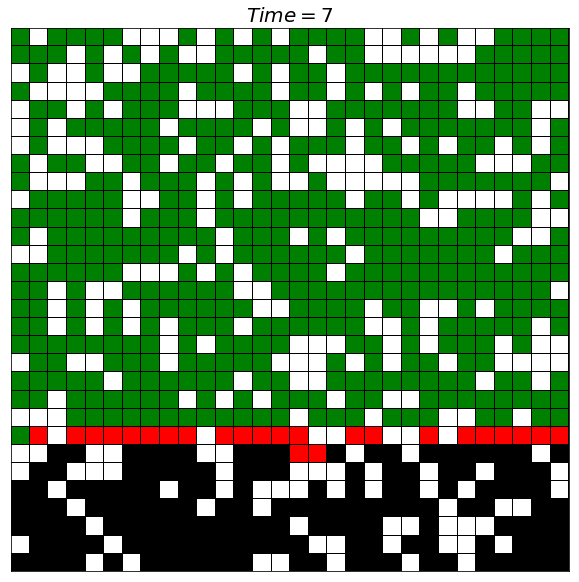

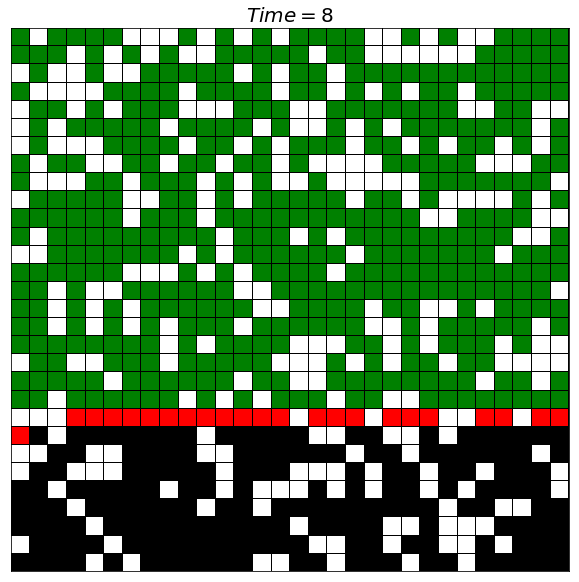

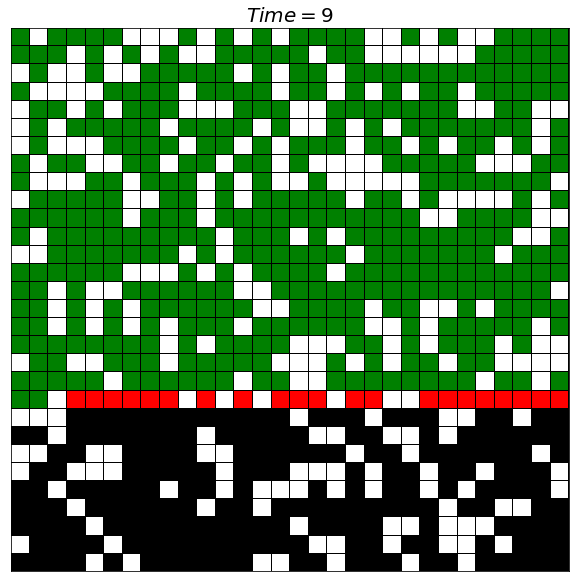

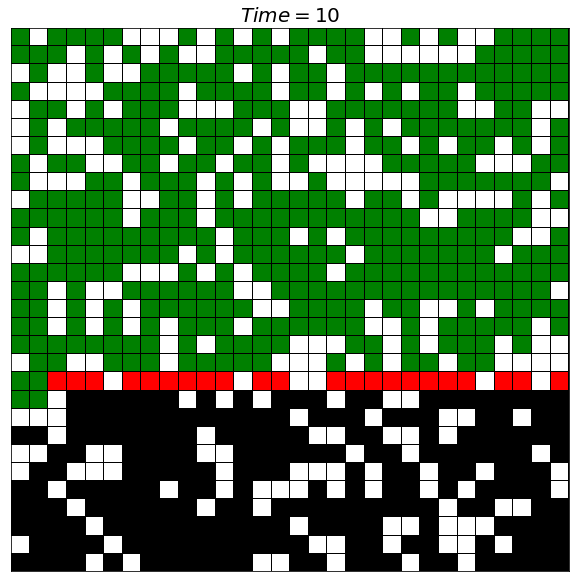

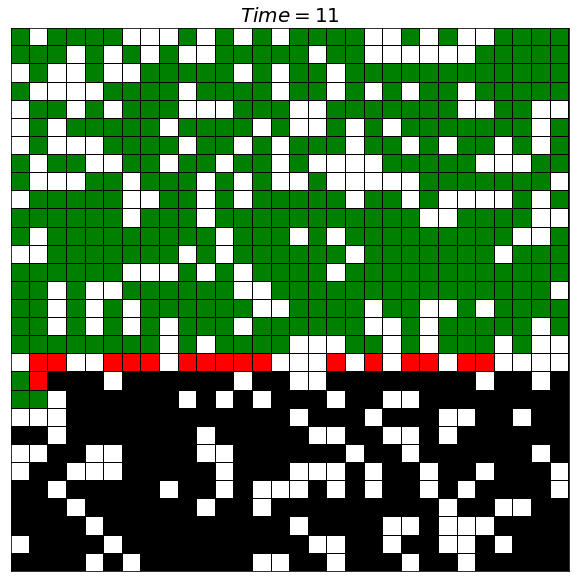

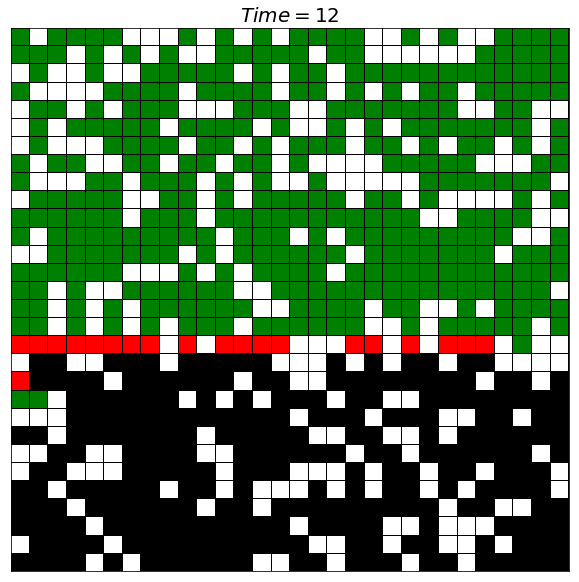

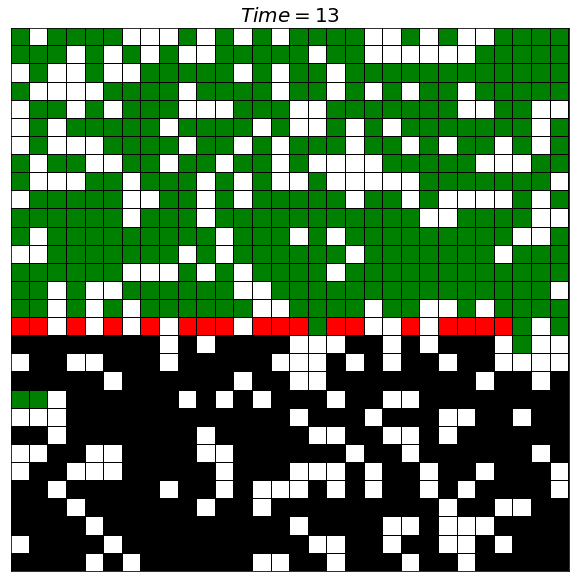

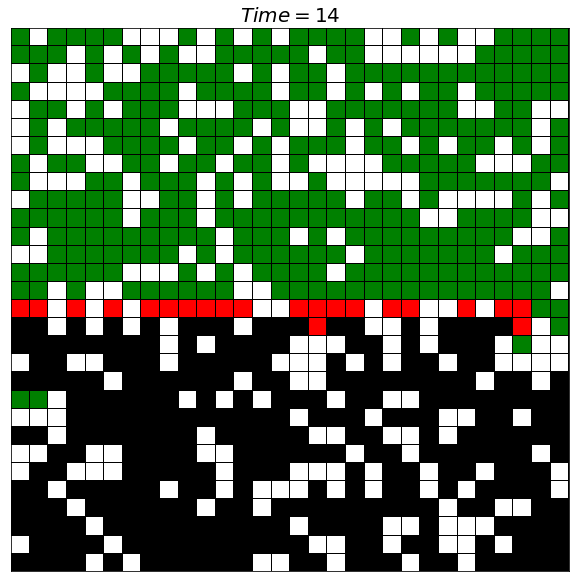

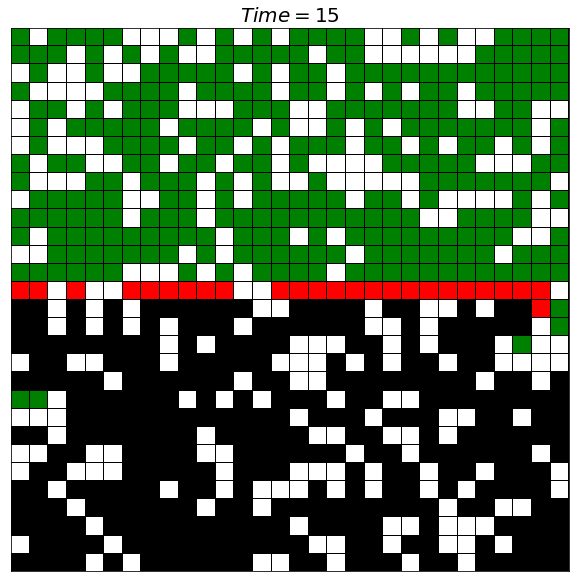

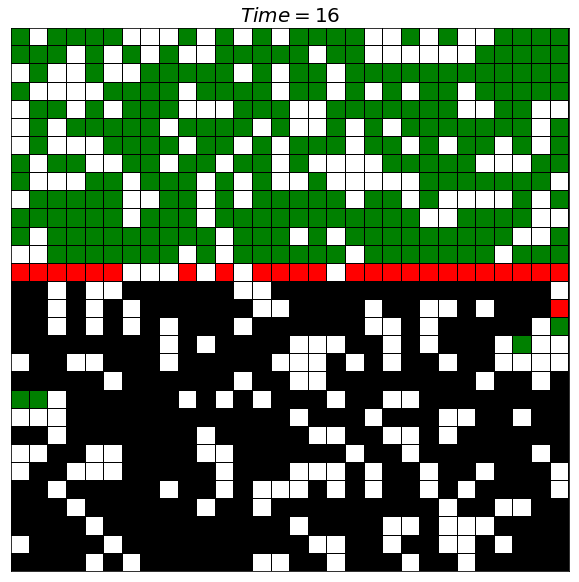

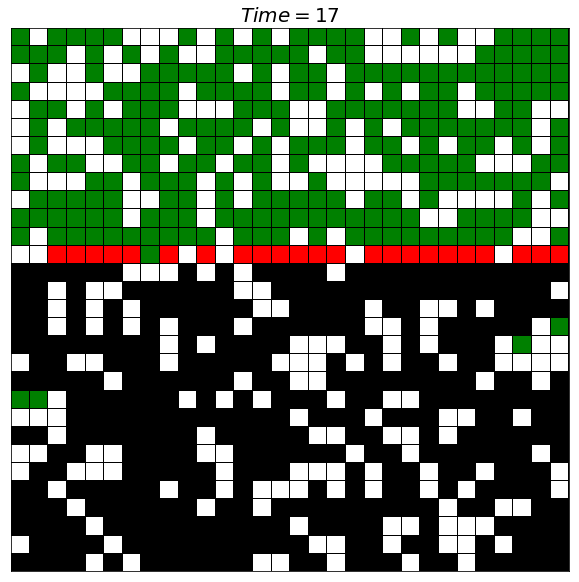

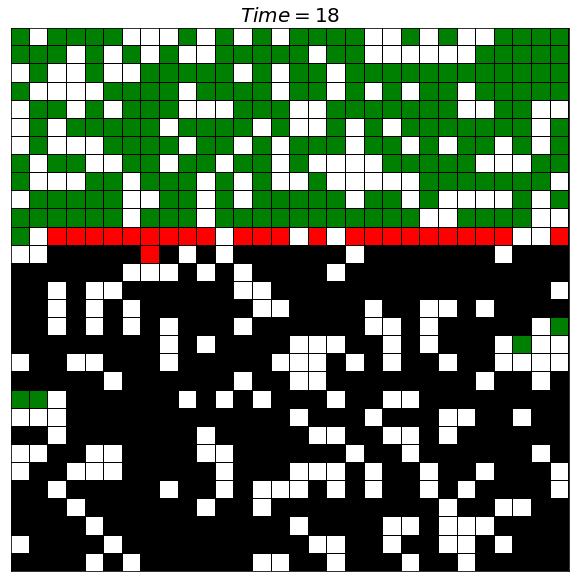

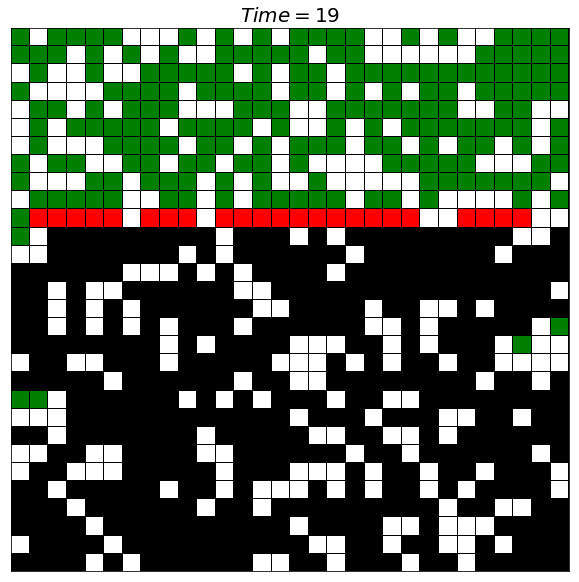

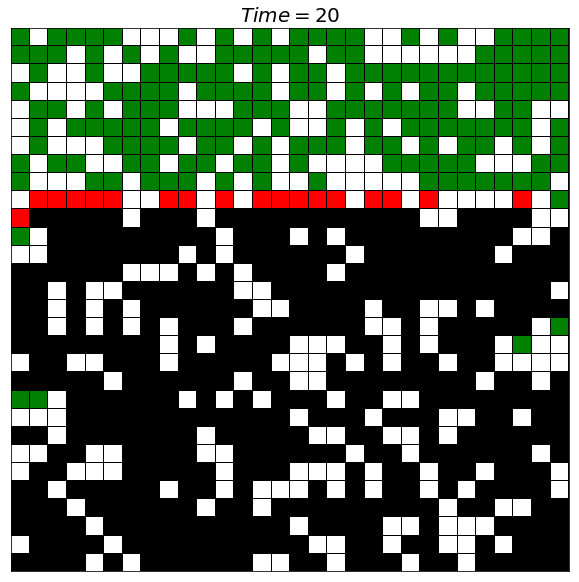

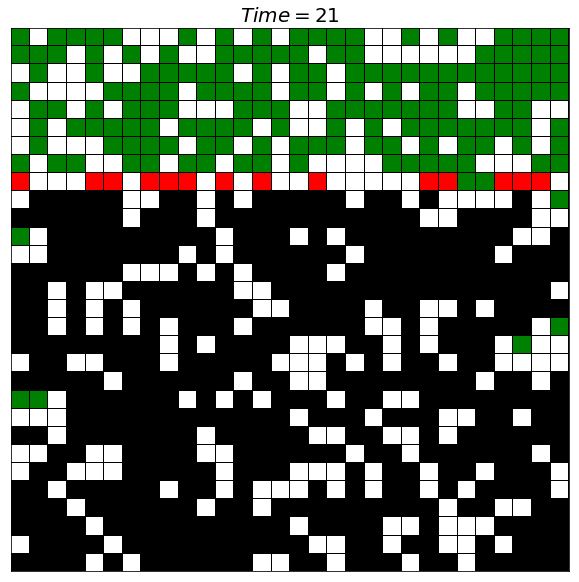

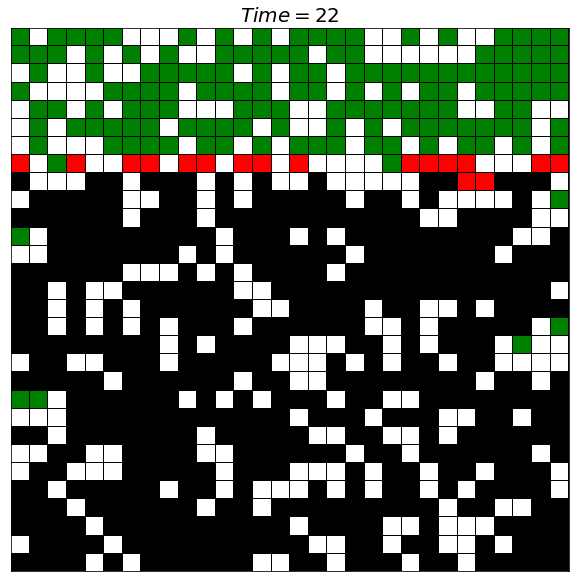

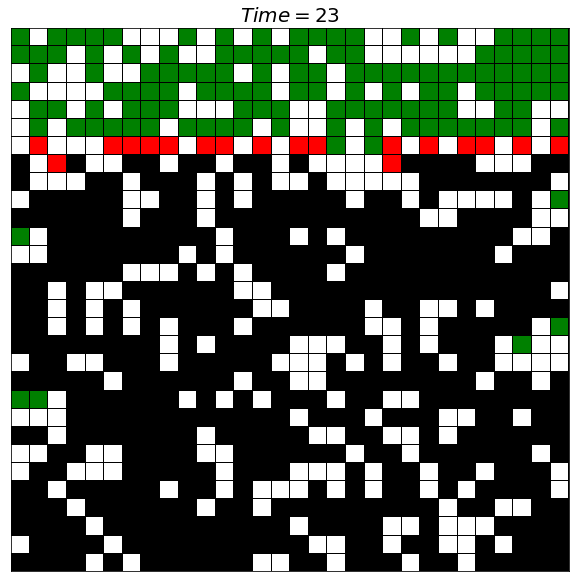

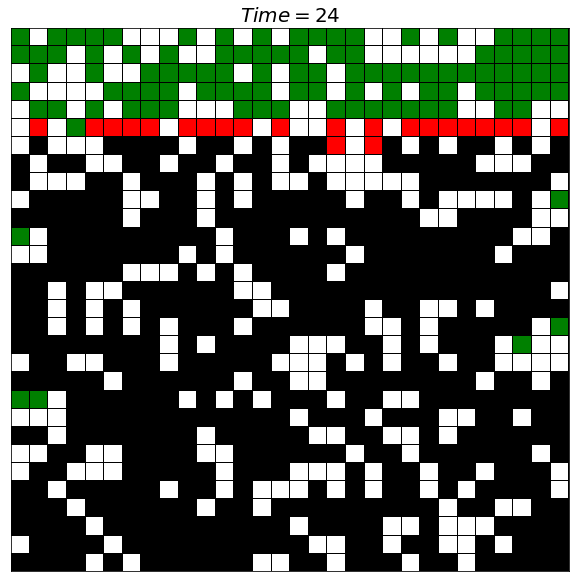

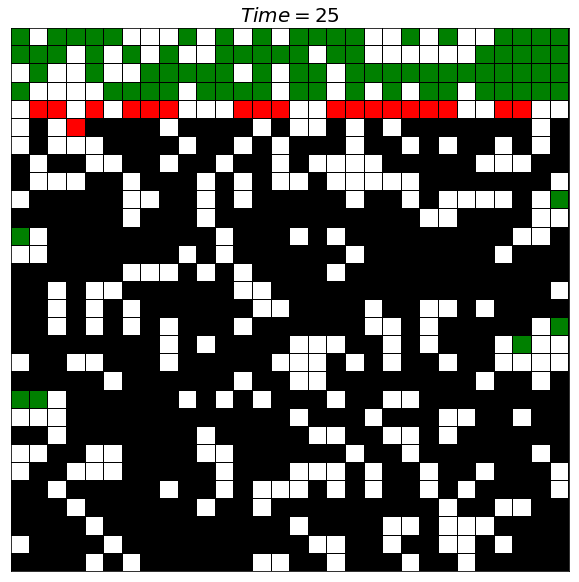

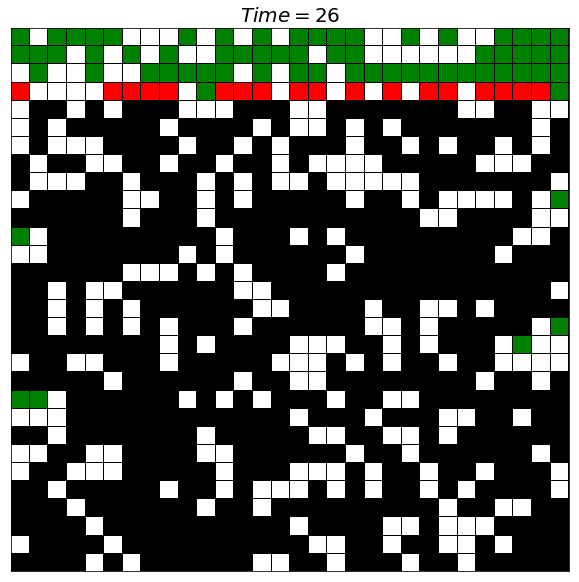

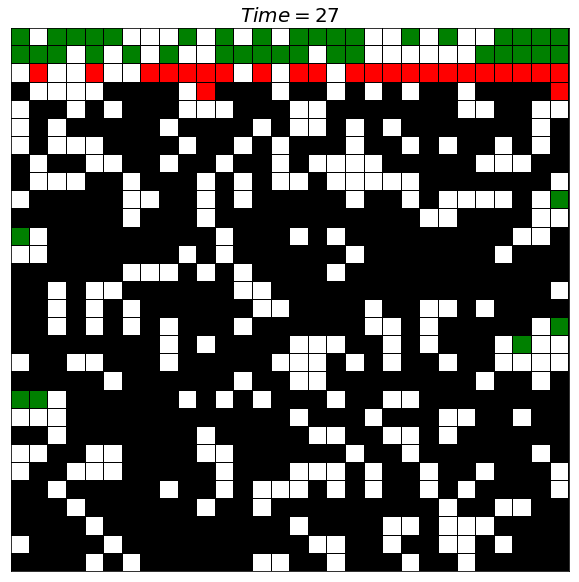

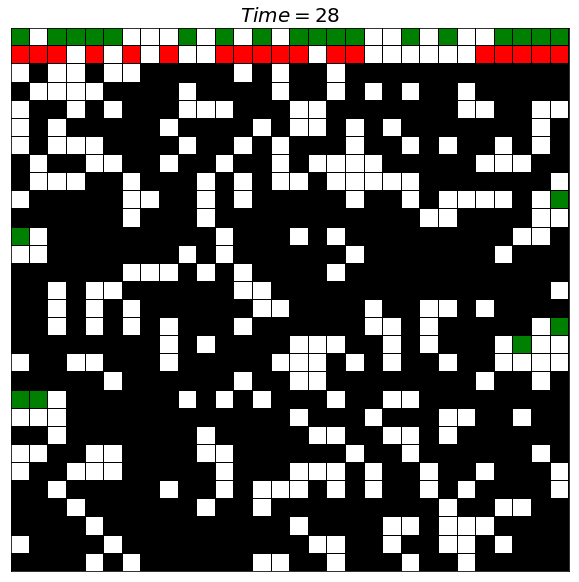

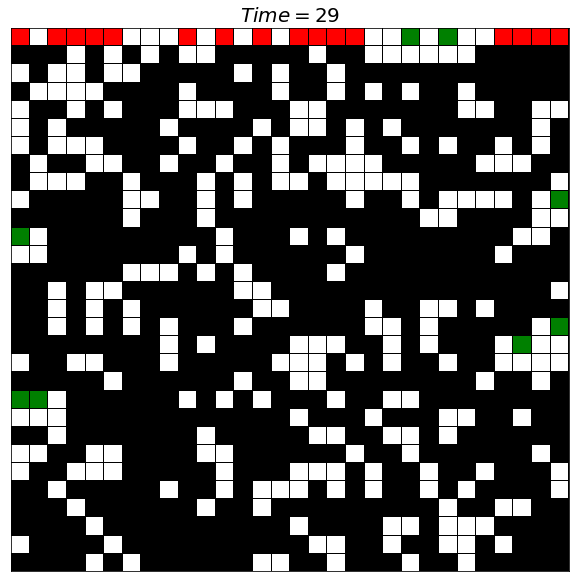

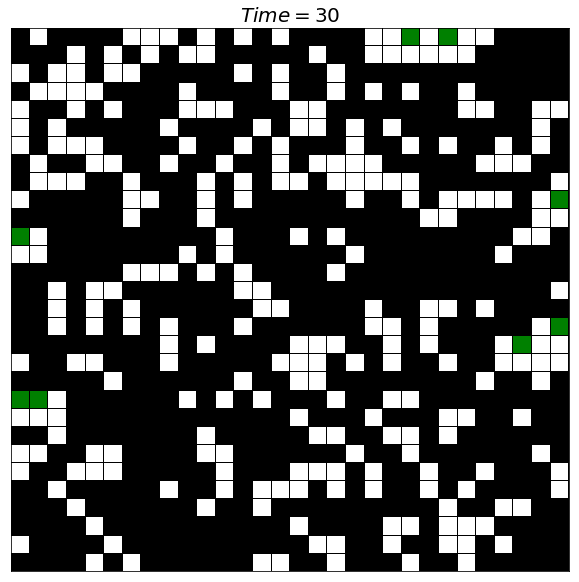

In [18]:
colors_list = ['white', 'green','red']
cmap1 = colors.ListedColormap(colors_list)

fig = plt.figure(figsize=(10,10))
plt.pcolormesh(simulation[0], cmap = cmap1, edgecolors='k', linewidth=0.01)
plt.xticks([],[])
plt.yticks([],[])
plt.title('$Time = %d$' %0, fontsize=20)
plt.savefig('frame_0.png')


colorlist1 = ['white', 'green','red','black']
cmap = colors.ListedColormap(colorlist1)

for i in range(1,len(simulation)):
    fig = plt.figure(figsize=(10,10))
    plt.pcolormesh(simulation[i], cmap = cmap, edgecolors='k', linewidth=0.01, animated=True)
    plt.xticks([],[])
    plt.yticks([],[])
    plt.title('$Time = %d$' %i, fontsize=20)
    plt.savefig("frame_{i}.png".format(i=i))
    


In [22]:
import glob
import os

gif_name = 'forest_fire'
file_list = glob.glob('*.png') # Get all the pngs in the current directory
list.sort(file_list, key=lambda x: int(x.split('_')[1].split('.png')[0])) # Sort the images by #, this may need to be tweaked for your use case

with open('image_list.txt', 'w') as file:
    for item in file_list:
        file.write("%s\n" % item)

os.system('convert @image_list.txt {}.gif'.format(gif_name))# 

4

In [33]:
import glob
import moviepy.editor as mpy

gif_name = 'ForestFire'
fps = 5
file_list = glob.glob('*.png') # Get all the pngs in the current directory
list.sort(file_list, key=lambda x: int(x.split('_')[1].split('.png')[0])) # Sort the images by #, this may need to be tweaked for your use case
clip = mpy.ImageSequenceClip(file_list, fps=fps)
clip.write_videofile('{}.mp4'.format(gif_name), fps=fps)

Moviepy - Building video ForestFire.mp4.
Moviepy - Writing video ForestFire.mp4



Moviepy - Done !
Moviepy - video ready ForestFire.mp4


### Let's change the value of $p$ to see the simulation

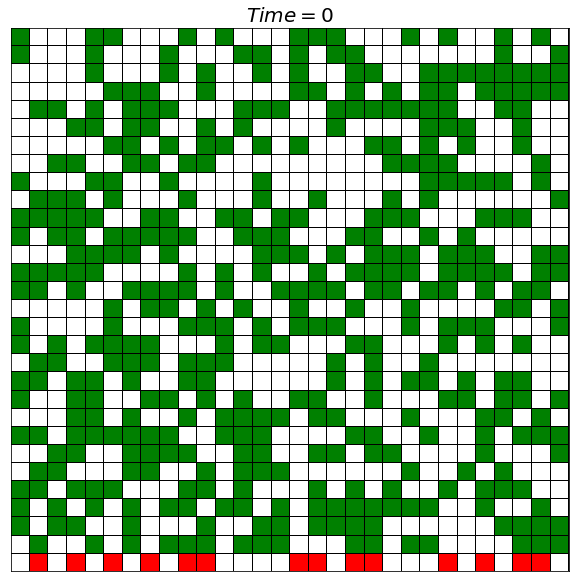

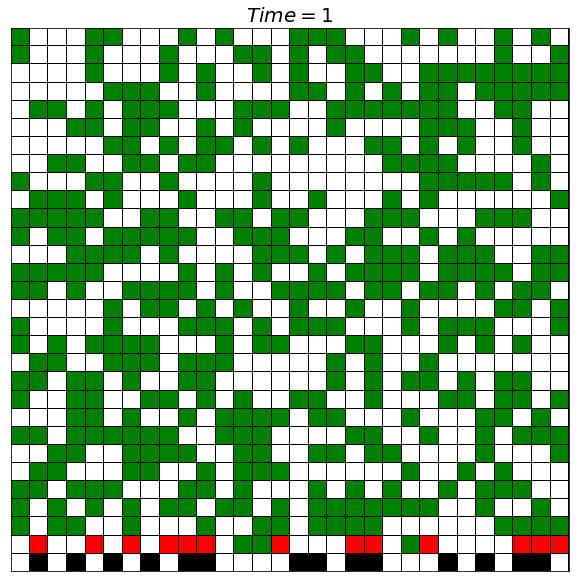

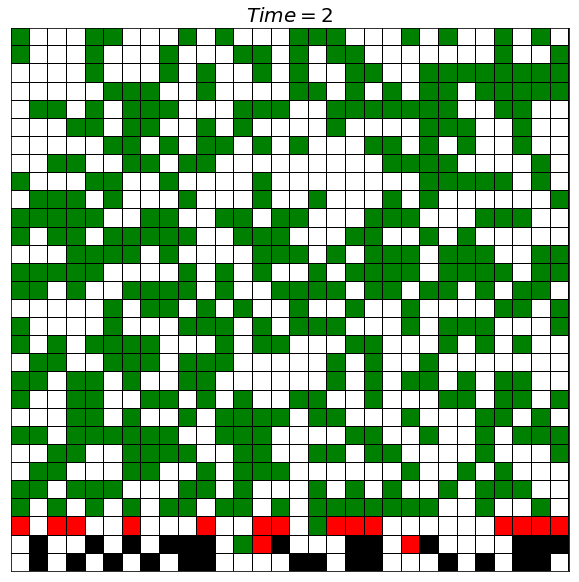

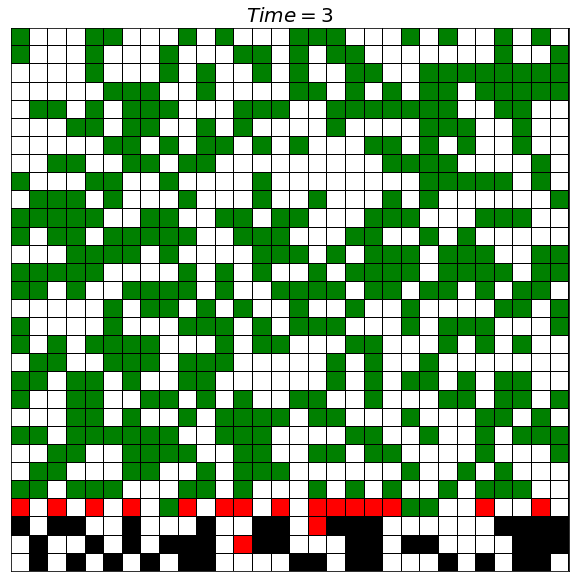

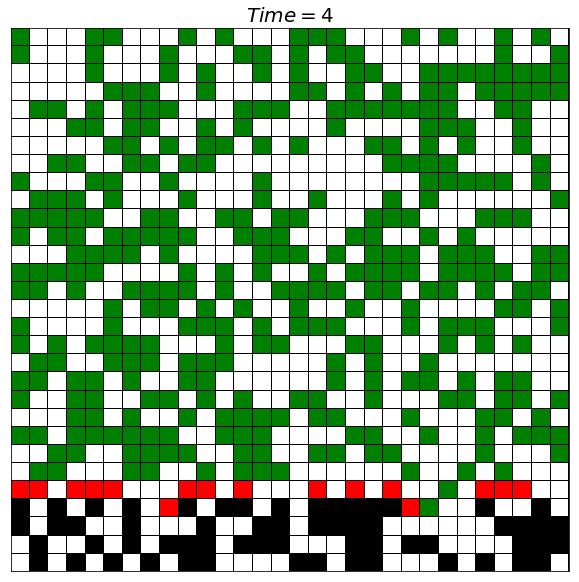

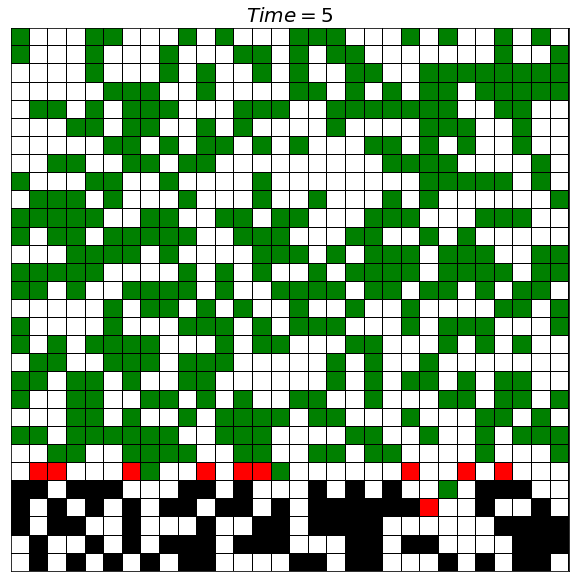

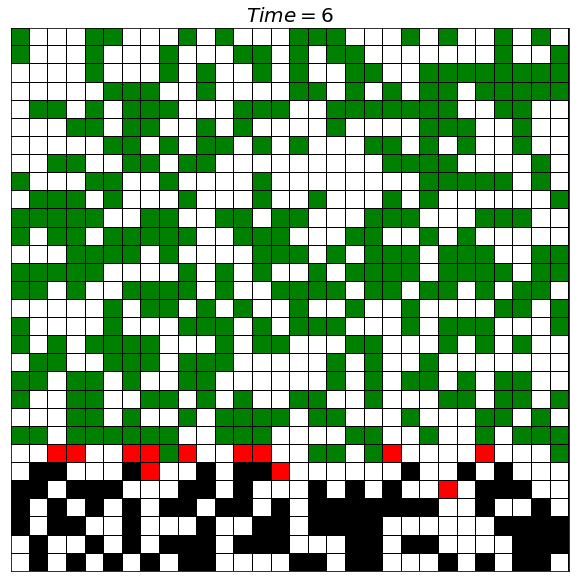

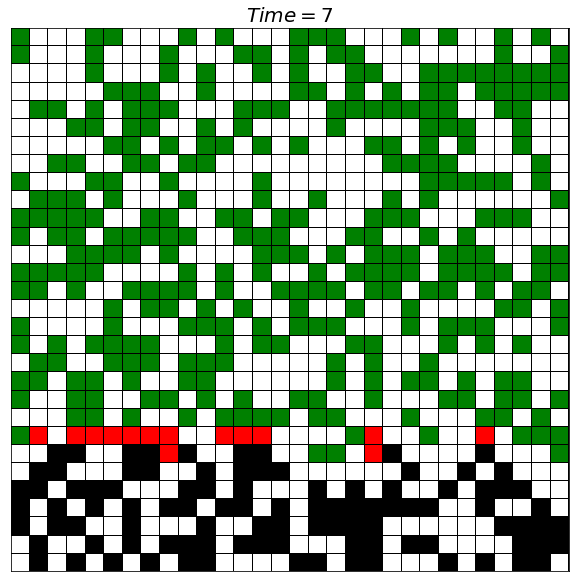

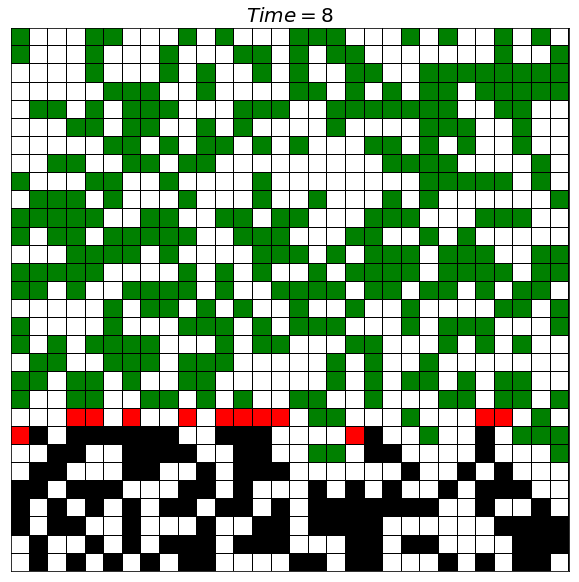

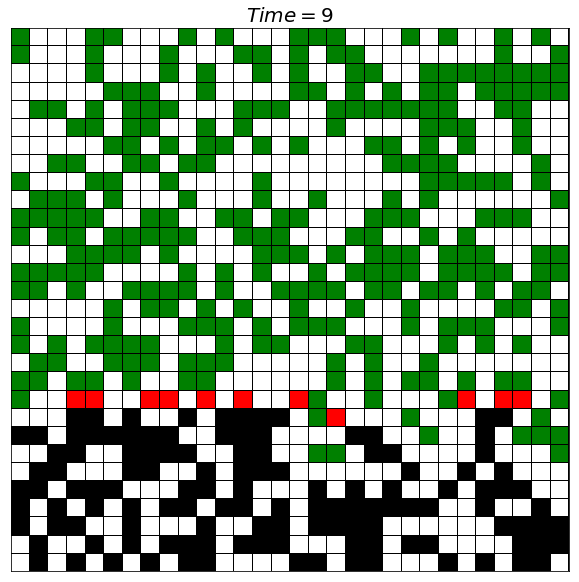

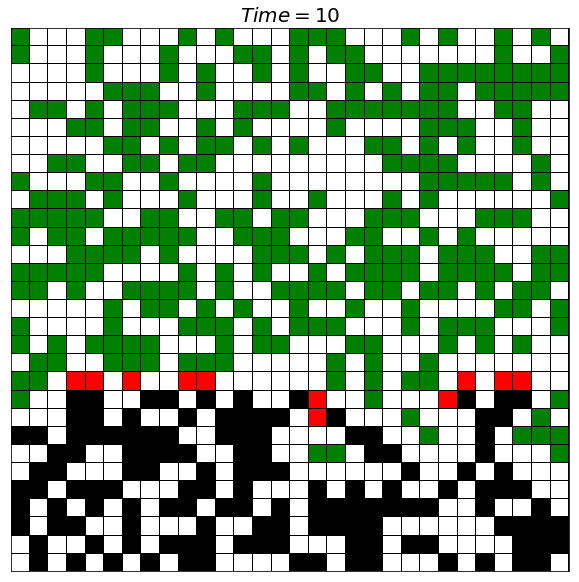

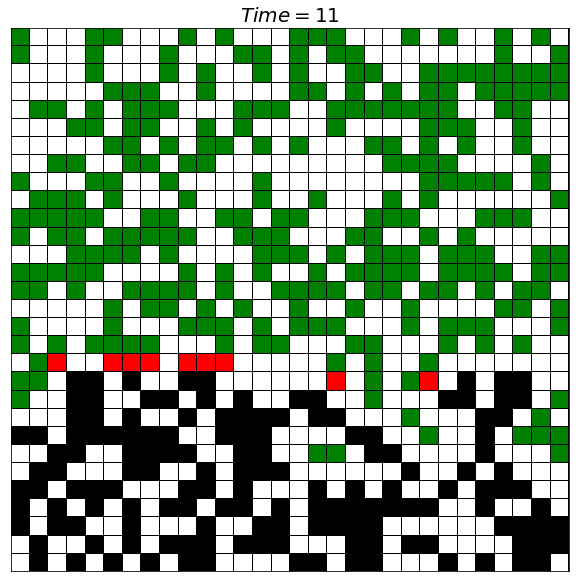

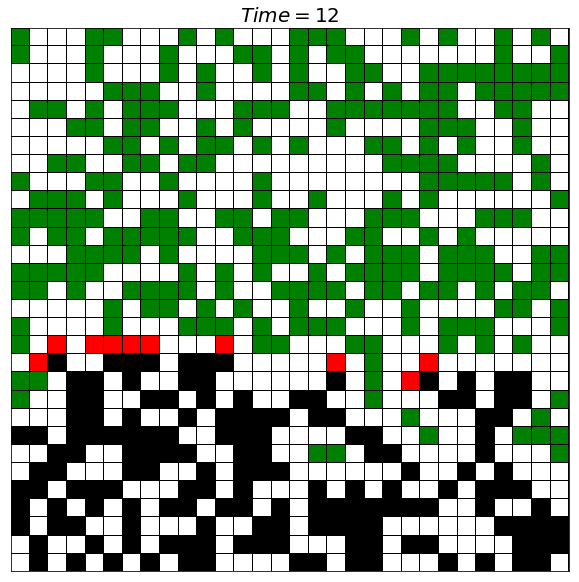

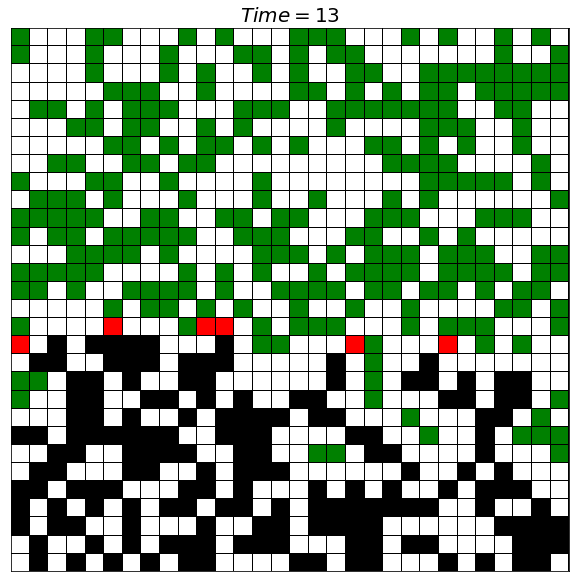

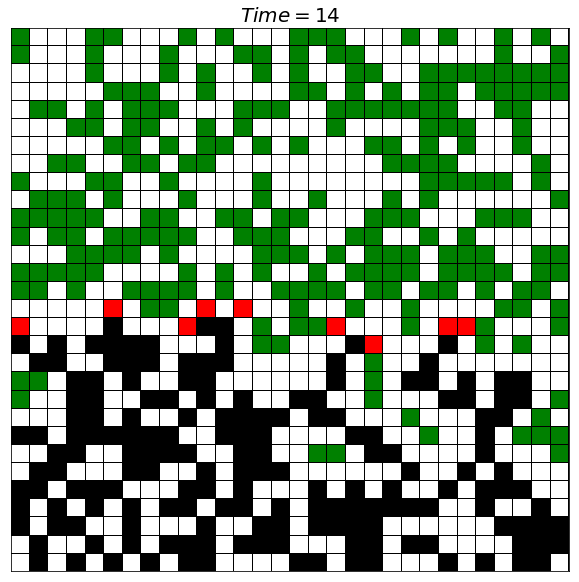

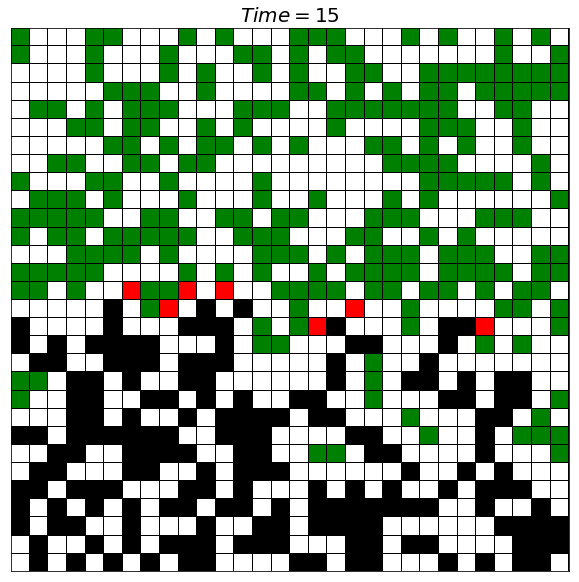

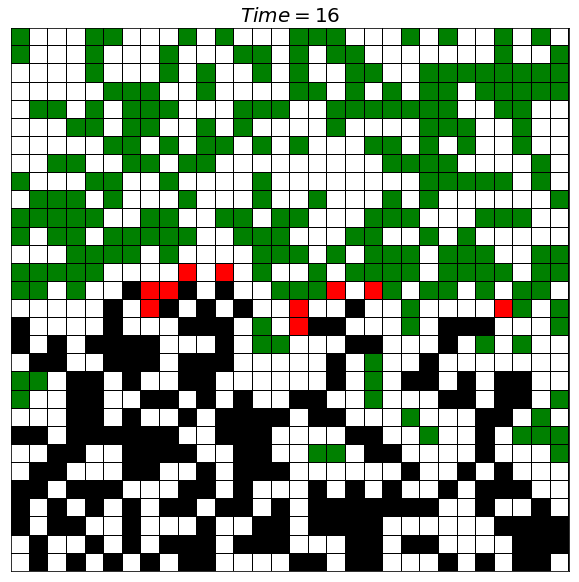

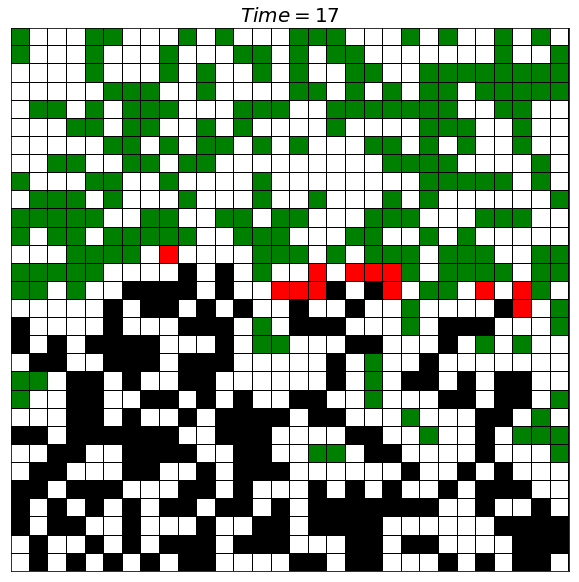

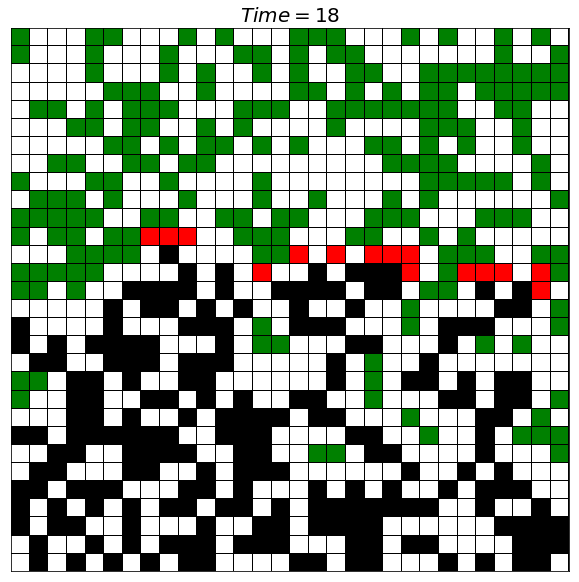

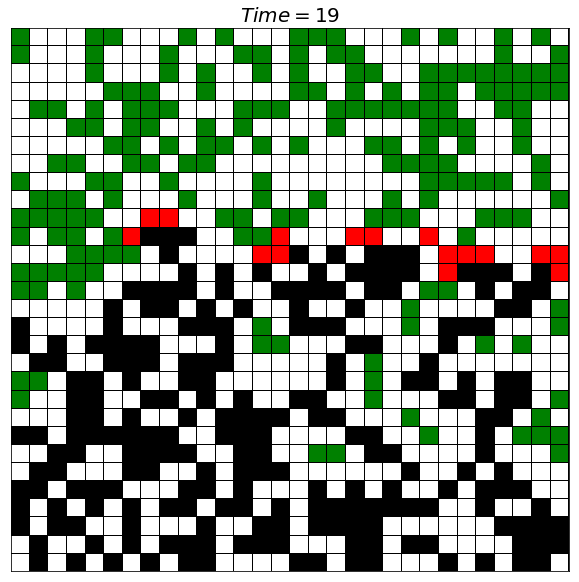

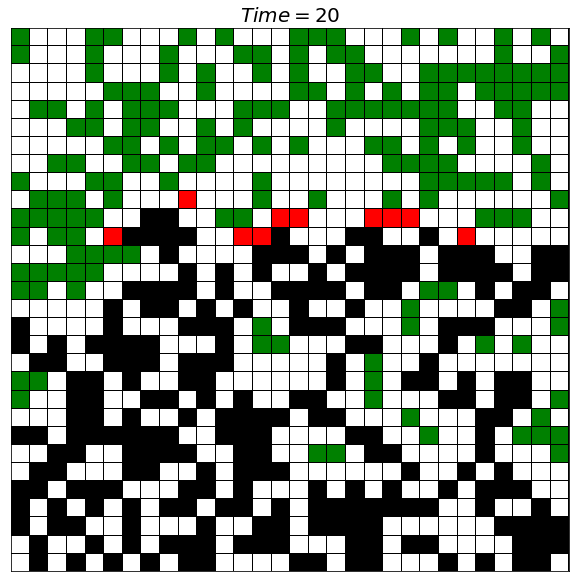

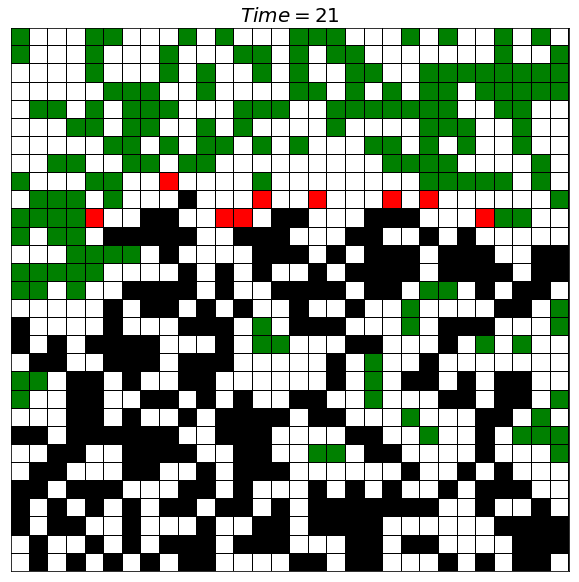

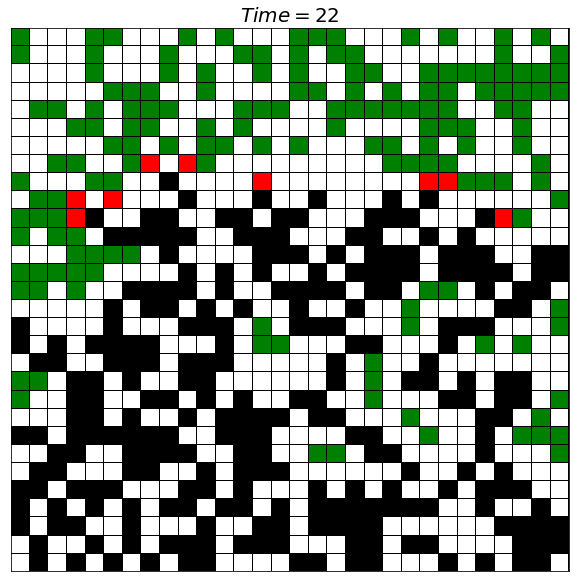

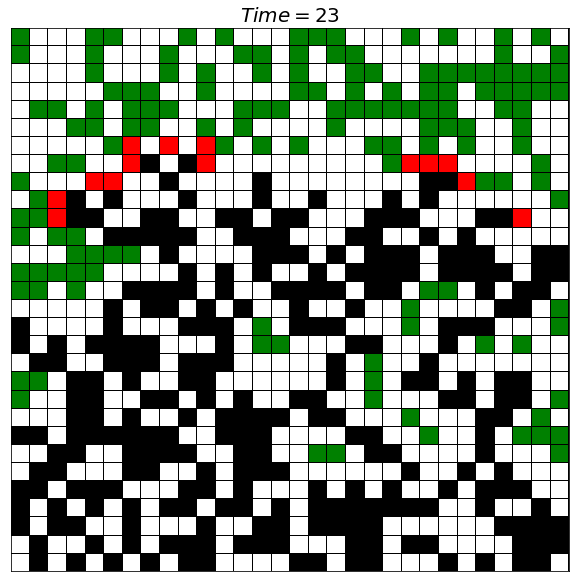

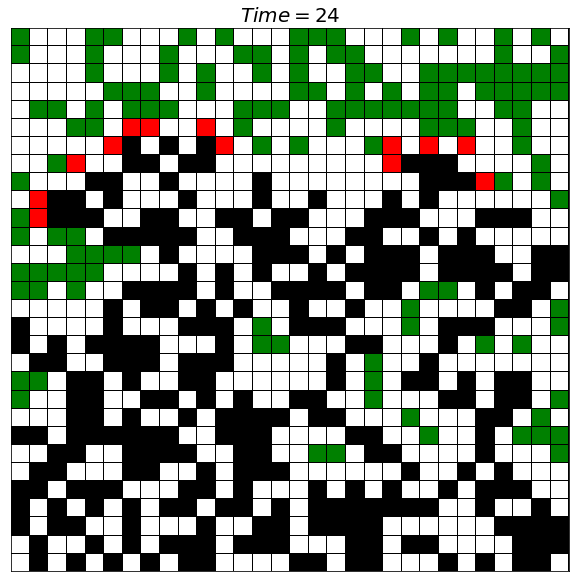

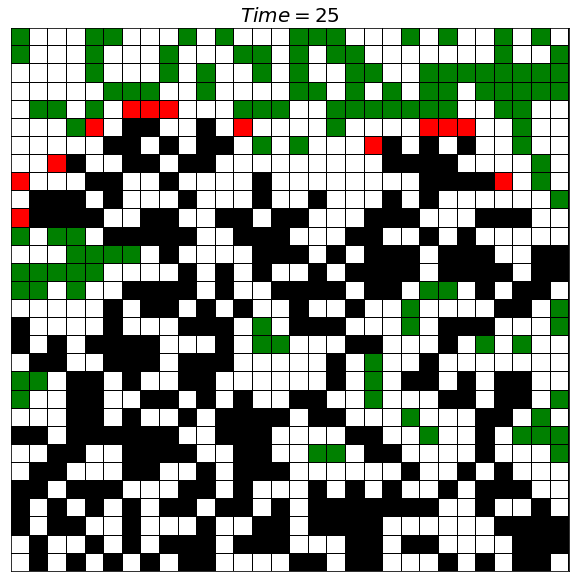

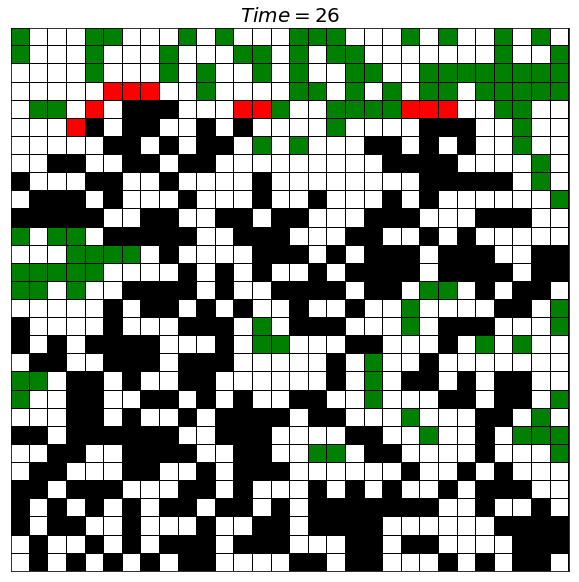

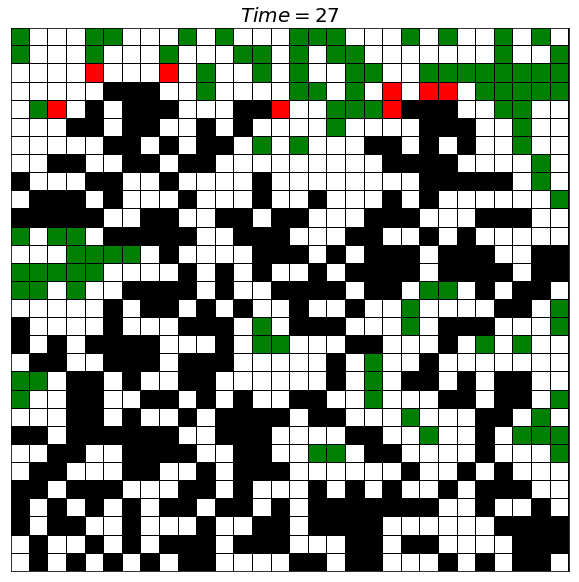

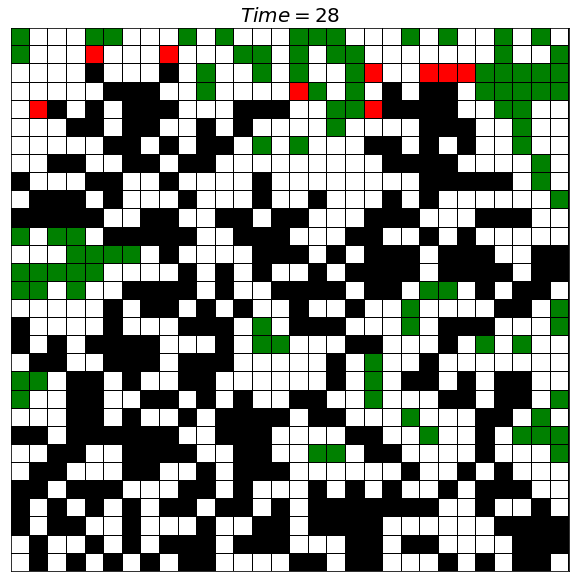

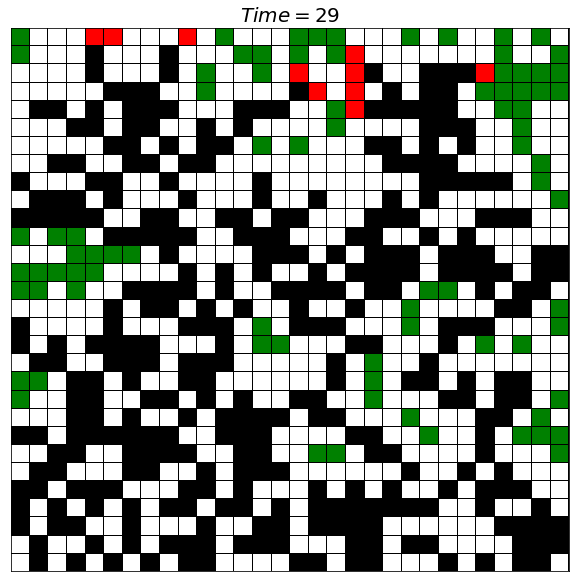

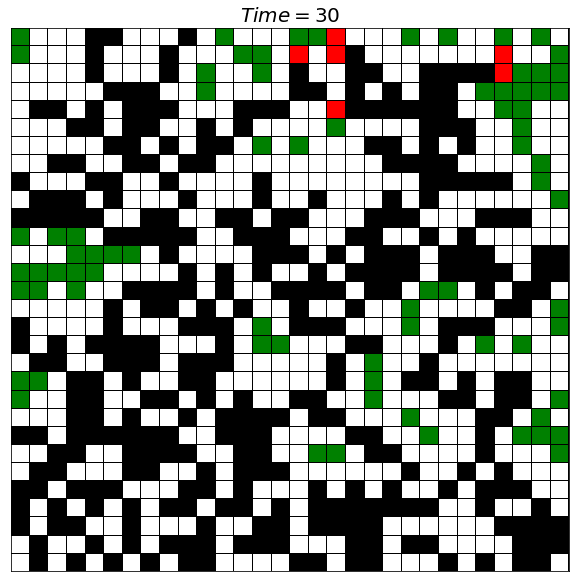

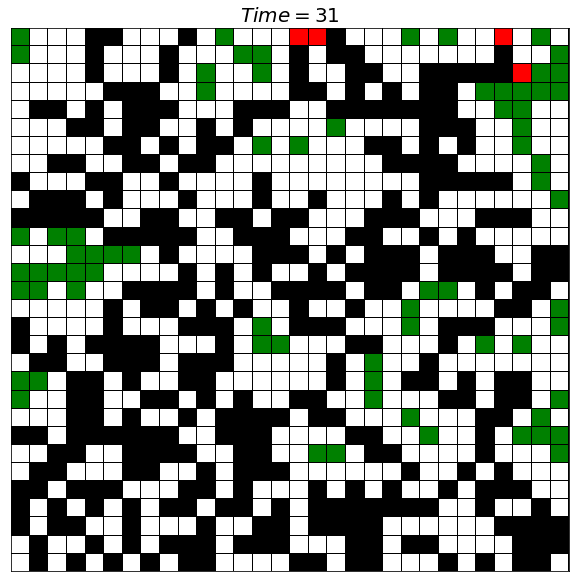

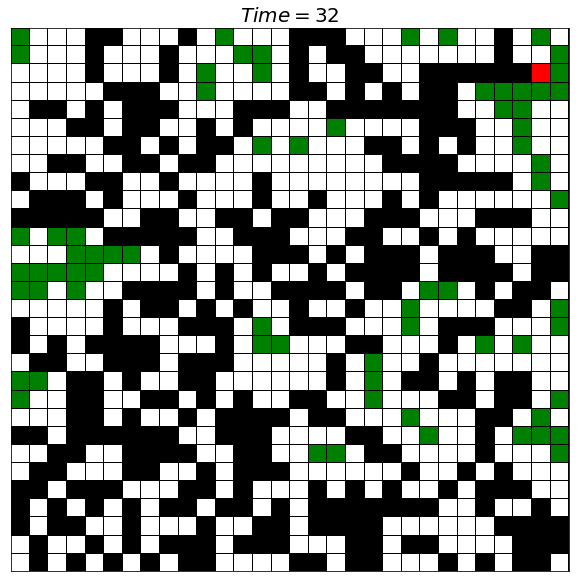

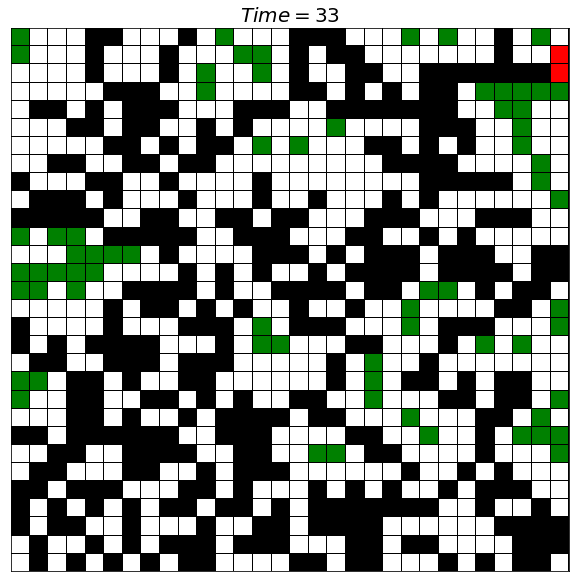

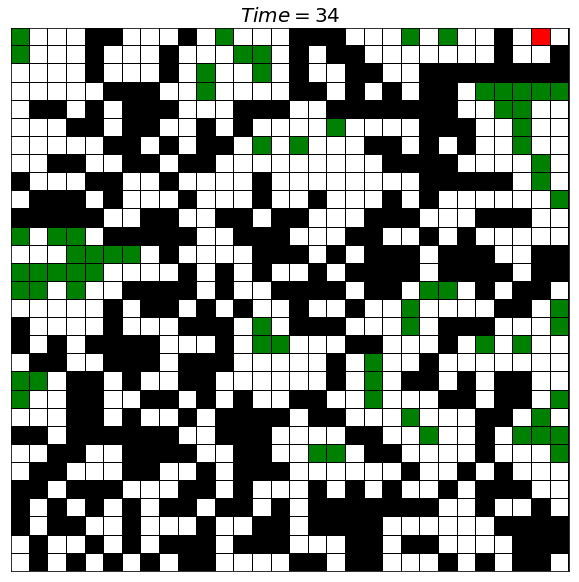

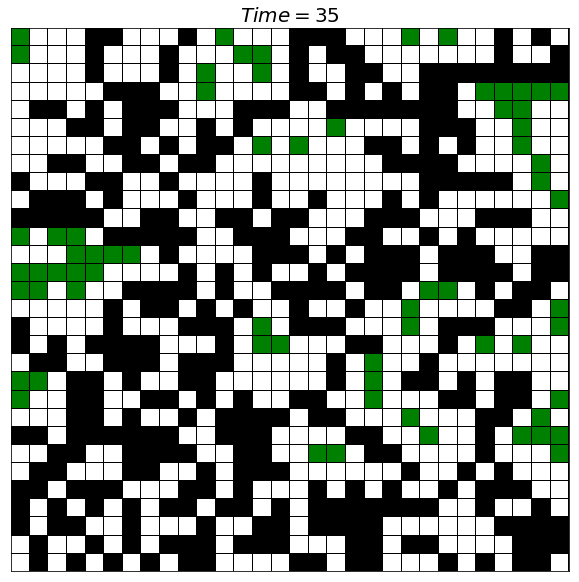

In [39]:
np.random.seed(30)
forest_to_burn2 = create_forest(30,30,0.47)

### Now, let's burn this forest
simulation1 = forest_fire(forest_to_burn2,tmax=300)


colors_list = ['white', 'green','red']
cmap1 = colors.ListedColormap(colors_list)

fig = plt.figure(figsize=(10,10))
plt.pcolormesh(simulation1[0], cmap = cmap1, edgecolors='k', linewidth=0.01)
plt.xticks([],[])
plt.yticks([],[])
plt.title('$Time = %d$' %0, fontsize=20)
plt.savefig('frame_0.png')


colorlist1 = ['white', 'green','red','black']
cmap = colors.ListedColormap(colorlist1)

for i in range(1,len(simulation1)):
    fig = plt.figure(figsize=(10,10))
    plt.pcolormesh(simulation1[i], cmap = cmap, edgecolors='k', linewidth=0.01, animated=True)
    plt.xticks([],[])
    plt.yticks([],[])
    plt.title('$Time = %d$' %i, fontsize=20)
    plt.savefig("frame_{i}.png".format(i=i))
    


In [40]:
import glob
import os

gif_name = 'forest_fire_simulation'
file_list = glob.glob('*.png') # Get all the pngs in the current directory
list.sort(file_list, key=lambda x: int(x.split('_')[1].split('.png')[0])) # Sort the images by #, this may need to be tweaked for your use case

with open('image_list.txt', 'w') as file:
    for item in file_list:
        file.write("%s\n" % item)

os.system('convert @image_list.txt {}.gif'.format(gif_name))# 

4

In [43]:
import glob
import moviepy.editor as mpy

gif_name = 'forest_file_simulation'
fps = 5
file_list = glob.glob('*.png') # Get all the pngs in the current directory
list.sort(file_list, key=lambda x: int(x.split('_')[1].split('.png')[0])) # Sort the images by #, this may need to be tweaked for your use case
clip = mpy.ImageSequenceClip(file_list, fps=fps)
clip.write_gif('{}.gif'.format(gif_name), fps=fps)

MoviePy - Building file forest_file_simulation.gif with imageio.


### References

[1] Introduction to percolation theory, Dietric Stauffer, Ammon Aharony, 1994.


[2] Applications of percolation theory, Muhammad Sahini, 1994